# Machine Learning - Supermarket Database Case

## Objectives

1.	What items customers buy the most and are there any items we should ignore?
2.	What is our strategy to increase sales based on our export destination countries?
3.	Do customer segmentation appropriately, and explain in detail and completely
4.	Get the hidden insight from the data

## Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import warnings        
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'C:\Users\User\Documents\DATA SCIENCE\IYKRA\ML\ML_2_fellow.csv', encoding= 'unicode_escape')
data

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


## Data Understanding

<table>
<thead>
<tr><th>Columns</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td>Kode Bayar</td><td>Computer generated sales slip invoice identification number</td></tr>
<tr><td>Kode Barang</td><td>Item identification number</td></tr>
<tr><td>Barang</td><td>Item description</td></tr>
<tr><td>Jumlah</td><td>Total sales item sold per invoice</td></tr>
<tr><td>Tanggal_Transaksi</td><td>Date of purchase</td></tr>
<tr><td>Harga_Satuan</td><td>Price of each product in dollar</td></tr>
<tr><td>Kode_Pelanggan</td><td>Customer identification number</td></tr>
<tr><td>Negara</td><td>The area of buyer come from</td></tr>
</tbody>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             535874 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       535874 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


Tanggal_Transaksi is not an datetime, so we have to change that.

In [4]:
data

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [5]:
#Check null data
data.isna().sum()

Kode_Bayar                0
Kode_Barang            6035
Barang                 7489
Jumlah                 6035
Tanggal_Transaksi      6035
Harga_Satuan           6035
Kode_Pelanggan       138727
Negara                 6035
dtype: int64

In [6]:
#showing the null data
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]

rows_with_NaN

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,536414,22139,NaN,56.0,12/1/2010 11:52,0.00,NaN,United Kingdom
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1.0,12/9/2011 10:26,1714.17,NaN,United Kingdom
541549,"581501,22165,""DIAMANTE HEART SHAPED WALL MIRRO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541614,"581516,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541649,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are almost all null data, the difference is in the date column. So we decided to mark that abnormal data.

In [7]:
#showing the abnormal data
abnormal = pd.isnull(data["Tanggal_Transaksi"])
null_value = data[abnormal]
null_value

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,"536520,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
541379,"581498,22041,""RECORD FRAME 7"""" SINGLE SIZE "",2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541549,"581501,22165,""DIAMANTE HEART SHAPED WALL MIRRO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541614,"581516,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541649,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
splitdata1 = null_value['Kode_Bayar'].str.split(',', n=2, expand=True).rename(columns={0:'Kode_Bayar', 1:'Kode_Barang', 2:'NAN'})
splitdata1

,Kode_Bayar,Kode_Barang,NAN
109,536381,82567,"""AIRLINE LOUNGE,METAL SIGN"",2,12/1/2010 9:41,2..."
253,536394,21506,"""FANCY FONT BIRTHDAY CARD, "",24,12/1/2010 10:3..."
871,536477,22041,"""RECORD FRAME 7"""" SINGLE SIZE "",48,12/1/2010 1..."
956,536520,22760,"""TRAY, BREAKFAST IN BED"",1,12/1/2010 12:43,12...."
1014,536520,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS"",1,12/1/20..."
...,...,...,...
541379,581498,22041,"""RECORD FRAME 7"""" SINGLE SIZE "",2,12/9/2011 10..."
541549,581501,22165,"""DIAMANTE HEART SHAPED WALL MIRROR, "",12,12/9/..."
541614,581516,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS"",24,12/9/2..."
541649,581538,85071C,"""CHARLIE+LOLA""""EXTREMELY BUSY"""" SIGN"",1,12/9/2..."


In [9]:
splitdata2 = splitdata1['NAN'].str.split('",', n=1, expand=True).rename(columns={0:'Barang', 1:'NaN'})
splitdata2

,Barang,NaN
109,"""AIRLINE LOUNGE,METAL SIGN","2,12/1/2010 9:41,2.1,15311,United Kingdom"
253,"""FANCY FONT BIRTHDAY CARD,","24,12/1/2010 10:39,0.42,13408,United Kingdom"
871,"""RECORD FRAME 7"""" SINGLE SIZE","48,12/1/2010 12:27,2.1,16210,United Kingdom"
956,"""TRAY, BREAKFAST IN BED","1,12/1/2010 12:43,12.75,14729,United Kingdom"
1014,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS","1,12/1/2010 12:43,2.95,14729,United Kingdom"
...,...,...
541379,"""RECORD FRAME 7"""" SINGLE SIZE","2,12/9/2011 10:26,5.79,,United Kingdom"
541549,"""DIAMANTE HEART SHAPED WALL MIRROR,","12,12/9/2011 10:46,3.95,12985,United Kingdom"
541614,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS","24,12/9/2011 11:26,1.25,14422,United Kingdom"
541649,"""CHARLIE+LOLA""""EXTREMELY BUSY"""" SIGN","1,12/9/2011 11:34,0.39,14446,United Kingdom"


In [10]:
splitdata3 = splitdata2['NaN'].str.split(',', n=4, expand=True).rename(columns={0:'Jumlah', 1:'Tanggal_Transaksi', 2:'Harga_Satuan', 3:'Kode_Pelanggan', 4:'Negara'})
splitdata3

,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,2,12/1/2010 9:41,2.1,15311,United Kingdom
253,24,12/1/2010 10:39,0.42,13408,United Kingdom
871,48,12/1/2010 12:27,2.1,16210,United Kingdom
956,1,12/1/2010 12:43,12.75,14729,United Kingdom
1014,1,12/1/2010 12:43,2.95,14729,United Kingdom
...,...,...,...,...,...
541379,2,12/9/2011 10:26,5.79,,United Kingdom
541549,12,12/9/2011 10:46,3.95,12985,United Kingdom
541614,24,12/9/2011 11:26,1.25,14422,United Kingdom
541649,1,12/9/2011 11:34,0.39,14446,United Kingdom


In [11]:
splitdata = pd.merge(splitdata1, splitdata2, right_index=True, left_index=True)
splitdata
clean = pd.merge(splitdata, splitdata3, right_index=True, left_index=True)
clean

,Kode_Bayar,Kode_Barang,NAN,Barang,NaN,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,536381,82567,"""AIRLINE LOUNGE,METAL SIGN"",2,12/1/2010 9:41,2...","""AIRLINE LOUNGE,METAL SIGN","2,12/1/2010 9:41,2.1,15311,United Kingdom",2,12/1/2010 9:41,2.1,15311,United Kingdom
253,536394,21506,"""FANCY FONT BIRTHDAY CARD, "",24,12/1/2010 10:3...","""FANCY FONT BIRTHDAY CARD,","24,12/1/2010 10:39,0.42,13408,United Kingdom",24,12/1/2010 10:39,0.42,13408,United Kingdom
871,536477,22041,"""RECORD FRAME 7"""" SINGLE SIZE "",48,12/1/2010 1...","""RECORD FRAME 7"""" SINGLE SIZE","48,12/1/2010 12:27,2.1,16210,United Kingdom",48,12/1/2010 12:27,2.1,16210,United Kingdom
956,536520,22760,"""TRAY, BREAKFAST IN BED"",1,12/1/2010 12:43,12....","""TRAY, BREAKFAST IN BED","1,12/1/2010 12:43,12.75,14729,United Kingdom",1,12/1/2010 12:43,12.75,14729,United Kingdom
1014,536520,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS"",1,12/1/20...","""SWISS ROLL TOWEL, CHOCOLATE SPOTS","1,12/1/2010 12:43,2.95,14729,United Kingdom",1,12/1/2010 12:43,2.95,14729,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
541379,581498,22041,"""RECORD FRAME 7"""" SINGLE SIZE "",2,12/9/2011 10...","""RECORD FRAME 7"""" SINGLE SIZE","2,12/9/2011 10:26,5.79,,United Kingdom",2,12/9/2011 10:26,5.79,,United Kingdom
541549,581501,22165,"""DIAMANTE HEART SHAPED WALL MIRROR, "",12,12/9/...","""DIAMANTE HEART SHAPED WALL MIRROR,","12,12/9/2011 10:46,3.95,12985,United Kingdom",12,12/9/2011 10:46,3.95,12985,United Kingdom
541614,581516,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS"",24,12/9/2...","""SWISS ROLL TOWEL, CHOCOLATE SPOTS","24,12/9/2011 11:26,1.25,14422,United Kingdom",24,12/9/2011 11:26,1.25,14422,United Kingdom
541649,581538,85071C,"""CHARLIE+LOLA""""EXTREMELY BUSY"""" SIGN"",1,12/9/2...","""CHARLIE+LOLA""""EXTREMELY BUSY"""" SIGN","1,12/9/2011 11:34,0.39,14446,United Kingdom",1,12/9/2011 11:34,0.39,14446,United Kingdom


In [12]:
clean.drop(['NAN', 'NaN'], axis=1, inplace=True)
clean

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,536381,82567,"""AIRLINE LOUNGE,METAL SIGN",2,12/1/2010 9:41,2.1,15311,United Kingdom
253,536394,21506,"""FANCY FONT BIRTHDAY CARD,",24,12/1/2010 10:39,0.42,13408,United Kingdom
871,536477,22041,"""RECORD FRAME 7"""" SINGLE SIZE",48,12/1/2010 12:27,2.1,16210,United Kingdom
956,536520,22760,"""TRAY, BREAKFAST IN BED",1,12/1/2010 12:43,12.75,14729,United Kingdom
1014,536520,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS",1,12/1/2010 12:43,2.95,14729,United Kingdom
...,...,...,...,...,...,...,...,...
541379,581498,22041,"""RECORD FRAME 7"""" SINGLE SIZE",2,12/9/2011 10:26,5.79,,United Kingdom
541549,581501,22165,"""DIAMANTE HEART SHAPED WALL MIRROR,",12,12/9/2011 10:46,3.95,12985,United Kingdom
541614,581516,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS",24,12/9/2011 11:26,1.25,14422,United Kingdom
541649,581538,85071C,"""CHARLIE+LOLA""""EXTREMELY BUSY"""" SIGN",1,12/9/2011 11:34,0.39,14446,United Kingdom


In [13]:
non_null_value = data.dropna(subset=['Tanggal_Transaksi'])
non_null_value

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [14]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6035 entries, 109 to 541787
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Kode_Bayar         6035 non-null   object
 1   Kode_Barang        6035 non-null   object
 2   Barang             6035 non-null   object
 3   Jumlah             6035 non-null   object
 4   Tanggal_Transaksi  6035 non-null   object
 5   Harga_Satuan       6035 non-null   object
 6   Kode_Pelanggan     6035 non-null   object
 7   Negara             6035 non-null   object
dtypes: object(8)
memory usage: 584.3+ KB


In [15]:
clean['Kode_Pelanggan'] = data['Kode_Pelanggan'].replace([''],'0')
clean.tail()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
541379,581498,22041,"""RECORD FRAME 7"""" SINGLE SIZE",2,12/9/2011 10:26,5.79,NaN,United Kingdom
541549,581501,22165,"""DIAMANTE HEART SHAPED WALL MIRROR,",12,12/9/2011 10:46,3.95,NaN,United Kingdom
541614,581516,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS",24,12/9/2011 11:26,1.25,NaN,United Kingdom
541649,581538,85071C,"""CHARLIE+LOLA""""EXTREMELY BUSY"""" SIGN",1,12/9/2011 11:34,0.39,NaN,United Kingdom
541787,581578,21506,"""FANCY FONT BIRTHDAY CARD,",12,12/9/2011 12:16,0.42,NaN,Germany


In [16]:
clean[['Jumlah', 'Harga_Satuan']] = clean[['Jumlah', 'Harga_Satuan']].apply(pd.to_numeric)
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6035 entries, 109 to 541787
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kode_Bayar         6035 non-null   object 
 1   Kode_Barang        6035 non-null   object 
 2   Barang             6035 non-null   object 
 3   Jumlah             6035 non-null   int64  
 4   Tanggal_Transaksi  6035 non-null   object 
 5   Harga_Satuan       6035 non-null   float64
 6   Kode_Pelanggan     0 non-null      float64
 7   Negara             6035 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 584.3+ KB


In [17]:
clean

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,536381,82567,"""AIRLINE LOUNGE,METAL SIGN",2,12/1/2010 9:41,2.10,NaN,United Kingdom
253,536394,21506,"""FANCY FONT BIRTHDAY CARD,",24,12/1/2010 10:39,0.42,NaN,United Kingdom
871,536477,22041,"""RECORD FRAME 7"""" SINGLE SIZE",48,12/1/2010 12:27,2.10,NaN,United Kingdom
956,536520,22760,"""TRAY, BREAKFAST IN BED",1,12/1/2010 12:43,12.75,NaN,United Kingdom
1014,536520,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS",1,12/1/2010 12:43,2.95,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541379,581498,22041,"""RECORD FRAME 7"""" SINGLE SIZE",2,12/9/2011 10:26,5.79,NaN,United Kingdom
541549,581501,22165,"""DIAMANTE HEART SHAPED WALL MIRROR,",12,12/9/2011 10:46,3.95,NaN,United Kingdom
541614,581516,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS",24,12/9/2011 11:26,1.25,NaN,United Kingdom
541649,581538,85071C,"""CHARLIE+LOLA""""EXTREMELY BUSY"""" SIGN",1,12/9/2011 11:34,0.39,NaN,United Kingdom


In [18]:
dataclean = pd.concat([non_null_value, clean])
dataclean

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541379,581498,22041,"""RECORD FRAME 7"""" SINGLE SIZE",2.0,12/9/2011 10:26,5.79,NaN,United Kingdom
541549,581501,22165,"""DIAMANTE HEART SHAPED WALL MIRROR,",12.0,12/9/2011 10:46,3.95,NaN,United Kingdom
541614,581516,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS",24.0,12/9/2011 11:26,1.25,NaN,United Kingdom
541649,581538,85071C,"""CHARLIE+LOLA""""EXTREMELY BUSY"""" SIGN",1.0,12/9/2011 11:34,0.39,NaN,United Kingdom


In [19]:
dataclean = dataclean.sort_index()
dataclean

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [20]:
dataclean.tail(125)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
541784,581578,22991,GIRAFFE WOODEN RULER,12.0,12/9/2011 12:16,1.95,12713.0,Germany
541785,581578,23229,VINTAGE DONKEY TAIL GAME,6.0,12/9/2011 12:16,3.75,12713.0,Germany
541786,581578,22622,BOX OF VINTAGE ALPHABET BLOCKS,6.0,12/9/2011 12:16,11.95,12713.0,Germany
541787,581578,21506,"""FANCY FONT BIRTHDAY CARD,",12.0,12/9/2011 12:16,0.42,NaN,Germany
541788,581578,21507,ELEPHANT BIRTHDAY CARD,12.0,12/9/2011 12:16,0.42,12713.0,Germany
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [21]:
data.tail(125)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
541784,581578,22991,GIRAFFE WOODEN RULER,12.0,12/9/2011 12:16,1.95,12713.0,Germany
541785,581578,23229,VINTAGE DONKEY TAIL GAME,6.0,12/9/2011 12:16,3.75,12713.0,Germany
541786,581578,22622,BOX OF VINTAGE ALPHABET BLOCKS,6.0,12/9/2011 12:16,11.95,12713.0,Germany
541787,"581578,21506,""FANCY FONT BIRTHDAY CARD, "",12,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541788,581578,21507,ELEPHANT BIRTHDAY CARD,12.0,12/9/2011 12:16,0.42,12713.0,Germany
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


Look the different between dataclean and data. So dataclean is the good data for next step.

In [22]:
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        541909 non-null  object 
 2   Barang             540455 non-null  object 
 3   Jumlah             541909 non-null  float64
 4   Tanggal_Transaksi  541909 non-null  object 
 5   Harga_Satuan       541909 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             541909 non-null  object 
dtypes: float64(3), object(5)
memory usage: 37.2+ MB


In [23]:
dataclean["Tanggal_Transaksi"] = pd.to_datetime(data["Tanggal_Transaksi"])
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Kode_Bayar         541909 non-null  object        
 1   Kode_Barang        541909 non-null  object        
 2   Barang             540455 non-null  object        
 3   Jumlah             541909 non-null  float64       
 4   Tanggal_Transaksi  535874 non-null  datetime64[ns]
 5   Harga_Satuan       541909 non-null  float64       
 6   Kode_Pelanggan     403182 non-null  float64       
 7   Negara             541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 37.2+ MB


## Objective 1

### The item which customer buy the most

In [24]:
mostbuy = dataclean.groupby(['Barang']).sum().sort_values(by='Jumlah', ascending=False)
mostbuy = mostbuy [['Jumlah']].reset_index()
mostbuy.head(3)

,Barang,Jumlah
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847.0
1,JUMBO BAG RED RETROSPOT,47363.0
2,ASSORTED COLOUR BIRD ORNAMENT,36381.0


### Item we should ignore

In [25]:
#Check price anomaly
dataclean.sort_values(by='Harga_Satuan')

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
299984,A563187,B,Adjust bad debt,1.0,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1.0,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
40984,539750,22652,TRAVEL SEWING KIT,1.0,2010-12-21 15:40:00,0.00,NaN,United Kingdom
52217,540696,84562A,NaN,1.0,2011-01-11 09:14:00,0.00,NaN,United Kingdom
52262,540699,POST,NaN,1000.0,2011-01-11 09:32:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
16356,C537651,AMAZONFEE,AMAZON FEE,-1.0,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1.0,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1.0,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1.0,2011-12-05 11:36:00,17836.46,NaN,United Kingdom


#### We found another anomaly in column 'Kode_Barang' and 'Barang'

In [26]:
dataclean.loc[dataclean['Kode_Bayar'] == 'A563187']

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
299984,A563187,B,Adjust bad debt,1.0,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


After we check it, its only 1 item on that transaction, which mean its unexplained. We going deeper to list another anomaly.

In [27]:
dataclean.loc[dataclean['Kode_Barang'] == 'D']

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
141,C536379,D,Discount,-1.0,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1.0,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1.0,2010-12-07 12:34:00,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1.0,2010-12-08 16:00:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1.0,2010-12-15 09:14:00,5.76,16422.0,United Kingdom
...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1.0,2011-11-18 12:06:00,19.82,14527.0,United Kingdom
479869,C577227,D,Discount,-1.0,2011-11-18 12:06:00,16.76,14527.0,United Kingdom
493613,C578239,D,Discount,-1.0,2011-11-23 12:29:00,26.33,14912.0,Italy
516221,C579884,D,Discount,-1.0,2011-11-30 17:34:00,20.53,14527.0,United Kingdom


In [28]:
dataclean.loc[dataclean['Kode_Bayar'] == 'C581499']

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
541541,C581499,M,Manual,-1.0,2011-12-09 10:28:00,224.69,15498.0,United Kingdom


In [29]:
#filtering anomaly items
coba = (dataclean['Kode_Barang'].str.len() < 2)
cobalen = dataclean.loc[coba]
cobalen

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
141,C536379,D,Discount,-1.0,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
2239,536569,M,Manual,1.0,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1.0,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
5684,536865,M,Manual,1.0,2010-12-03 11:28:00,2.55,NaN,United Kingdom
6798,536981,M,Manual,2.0,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4.0,2011-12-06 14:23:00,1.25,17841.0,United Kingdom
533082,C581009,M,Manual,-1.0,2011-12-07 09:15:00,125.00,16971.0,United Kingdom
534308,C581145,M,Manual,-1.0,2011-12-07 13:48:00,9.95,17490.0,United Kingdom
538321,581405,M,Manual,3.0,2011-12-08 13:50:00,0.42,13521.0,United Kingdom


In [30]:
cobalen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 141 to 541541
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Kode_Bayar         715 non-null    object        
 1   Kode_Barang        715 non-null    object        
 2   Barang             715 non-null    object        
 3   Jumlah             715 non-null    float64       
 4   Tanggal_Transaksi  715 non-null    datetime64[ns]
 5   Harga_Satuan       715 non-null    float64       
 6   Kode_Pelanggan     542 non-null    float64       
 7   Negara             715 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 50.3+ KB


In [31]:
cobalen.Barang.unique()

array(['Discount', 'Manual', 'SAMPLES', 'Adjust bad debt'], dtype=object)

In [32]:
cobalen[cobalen['Barang'].str.contains('SAMPLES')]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
14436,C537581,S,SAMPLES,-1.0,2010-12-07 12:03:00,12.95,NaN,United Kingdom
14437,C537581,S,SAMPLES,-1.0,2010-12-07 12:03:00,52.00,NaN,United Kingdom
96680,C544580,S,SAMPLES,-1.0,2011-02-21 14:25:00,5.74,NaN,United Kingdom
96681,C544580,S,SAMPLES,-1.0,2011-02-21 14:25:00,11.08,NaN,United Kingdom
96682,C544580,S,SAMPLES,-1.0,2011-02-21 14:25:00,5.79,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
414147,C572347,S,SAMPLES,-1.0,2011-10-24 11:03:00,33.05,NaN,United Kingdom
419666,572849,S,SAMPLES,1.0,2011-10-26 12:20:00,33.05,NaN,United Kingdom
480961,C577330,S,SAMPLES,-1.0,2011-11-18 14:16:00,2.89,NaN,United Kingdom
480962,C577330,S,SAMPLES,-1.0,2011-11-18 14:16:00,75.00,NaN,United Kingdom


In [33]:
cobalen.loc[cobalen['Kode_Bayar'] == 'C544580']

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
96680,C544580,S,SAMPLES,-1.0,2011-02-21 14:25:00,5.74,NaN,United Kingdom
96681,C544580,S,SAMPLES,-1.0,2011-02-21 14:25:00,11.08,NaN,United Kingdom
96682,C544580,S,SAMPLES,-1.0,2011-02-21 14:25:00,5.79,NaN,United Kingdom
96683,C544580,S,SAMPLES,-1.0,2011-02-21 14:25:00,6.70,NaN,United Kingdom
96684,C544580,S,SAMPLES,-1.0,2011-02-21 14:25:00,8.74,NaN,United Kingdom
96685,C544580,S,SAMPLES,-1.0,2011-02-21 14:25:00,9.74,NaN,United Kingdom
96686,C544580,S,SAMPLES,-1.0,2011-02-21 14:25:00,9.99,NaN,United Kingdom
96687,C544580,S,SAMPLES,-1.0,2011-02-21 14:25:00,20.98,NaN,United Kingdom
96688,C544580,S,SAMPLES,-1.0,2011-02-21 14:25:00,7.69,NaN,United Kingdom
96689,C544580,S,SAMPLES,-1.0,2011-02-21 14:25:00,5.44,NaN,United Kingdom


**We decided to drop all anomaly data with item value 'Discount', 'Manual', 'SAMPLES', 'Adjust bad debt'.**

In [34]:
dataclean

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France


In [35]:
dataclean.drop(dataclean[dataclean['Kode_Barang'].str.len() < 2].index, inplace = True)
dataclean

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France


In [36]:
dataclean.loc[(dataclean['Kode_Barang'].str.len() < 2)]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara


#### Going deeper with Total Transaction or Harga_Satuan or Jumlah = 0

In [37]:
dataclean.loc[dataclean['Harga_Satuan'] == 0]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
622,536414,22139,NaN,56.0,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1.0,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1.0,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1.0,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1.0,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27.0,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240.0,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300.0,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20.0,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [38]:
dataclean.loc[dataclean['Harga_Satuan'] == 0].Barang.unique()

array([nan, 'amazon', '?', 'ROUND CAKE TIN VINTAGE GREEN', 'check',
       'damages', 'CREAM SWEETHEART LETTER RACK',
       'ZINC WILLIE WINKIE  CANDLE STICK', 'BOX OF 24 COCKTAIL PARASOLS',
       'DOORMAT ENGLISH ROSE ', 'DOORMAT 3 SMILEY CATS',
       'GREEN REGENCY TEACUP AND SAUCER', 'FRENCH BLUE METAL DOOR SIGN 7',
       'FRENCH BLUE METAL DOOR SIGN 5', 'FRENCH BLUE METAL DOOR SIGN 6',
       'FRENCH BLUE METAL DOOR SIGN 4', 'FRENCH BLUE METAL DOOR SIGN No',
       'FRENCH BLUE METAL DOOR SIGN 8', 'FRENCH BLUE METAL DOOR SIGN 1',
       'RED KITCHEN SCALES', 'IVORY KITCHEN SCALES',
       'SET OF 6 SOLDIER SKITTLES', 'CHILDS GARDEN TROWEL BLUE ',
       'CHILDRENS GARDEN GLOVES BLUE', 'PICNIC BASKET WICKER SMALL',
       'PICNIC BASKET WICKER LARGE', 'EMPIRE UNION JACK TV DINNER TRAY',
       'TV DINNER TRAY VINTAGE PAISLEY', 'SPACEBOY TV DINNER TRAY',
       'TV DINNER TRAY DOLLY GIRL', 'CHILDS GARDEN SPADE BLUE',
       'CHILDS GARDEN RAKE BLUE', 'WATERING CAN PINK BUNNY',
  

**Check the items should be not 0 price**

In [39]:
dataclean.loc[dataclean['Barang'] == 'DINOSAUR LUNCH BOX WITH CUTLERY'].sort_values(by='Harga_Satuan')

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
313667,564530,21561,DINOSAUR LUNCH BOX WITH CUTLERY,1.0,2011-08-25 14:57:00,0.00,NaN,United Kingdom
295427,562789,21561,DINOSAUR LUNCH BOX WITH CUTLERY,60.0,2011-08-09 13:50:00,2.10,14646.0,Netherlands
70315,542003,21561,DINOSAUR LUNCH BOX WITH CUTLERY,60.0,2011-01-25 11:07:00,2.10,15311.0,United Kingdom
66358,541789,21561,DINOSAUR LUNCH BOX WITH CUTLERY,36.0,2011-01-21 13:07:00,2.10,14088.0,United Kingdom
410647,572123,21561,DINOSAUR LUNCH BOX WITH CUTLERY,60.0,2011-10-21 08:40:00,2.10,14646.0,Netherlands
...,...,...,...,...,...,...,...,...
94884,544434,21561,DINOSAUR LUNCH BOX WITH CUTLERY,1.0,2011-02-18 16:12:00,4.96,NaN,United Kingdom
539452,581439,21561,DINOSAUR LUNCH BOX WITH CUTLERY,3.0,2011-12-08 16:30:00,4.96,NaN,United Kingdom
51911,540681,21561,DINOSAUR LUNCH BOX WITH CUTLERY,1.0,2011-01-10 16:25:00,5.06,NaN,United Kingdom
53088,540821,21561,DINOSAUR LUNCH BOX WITH CUTLERY,2.0,2011-01-11 13:16:00,5.06,NaN,United Kingdom


In [40]:
dataclean.loc[dataclean['Kode_Bayar'] == '564530']

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
313642,564530,22683,FRENCH BLUE METAL DOOR SIGN 8,3.0,2011-08-25 14:57:00,0.0,NaN,United Kingdom
313643,564530,22682,FRENCH BLUE METAL DOOR SIGN 7,1.0,2011-08-25 14:57:00,0.0,NaN,United Kingdom
313644,564530,22681,FRENCH BLUE METAL DOOR SIGN 6,3.0,2011-08-25 14:57:00,0.0,NaN,United Kingdom
313645,564530,22680,FRENCH BLUE METAL DOOR SIGN 5,1.0,2011-08-25 14:57:00,0.0,NaN,United Kingdom
313646,564530,22679,FRENCH BLUE METAL DOOR SIGN 4,3.0,2011-08-25 14:57:00,0.0,NaN,United Kingdom
313647,564530,22678,FRENCH BLUE METAL DOOR SIGN 3,3.0,2011-08-25 14:57:00,0.0,NaN,United Kingdom
313648,564530,22677,FRENCH BLUE METAL DOOR SIGN 2,4.0,2011-08-25 14:57:00,0.0,NaN,United Kingdom
313649,564530,21172,PARTY METAL SIGN,1.0,2011-08-25 14:57:00,0.0,NaN,United Kingdom
313650,564530,21116,OWL DOORSTOP,1.0,2011-08-25 14:57:00,0.0,NaN,United Kingdom
313651,564530,20682,RED RETROSPOT CHILDRENS UMBRELLA,1.0,2011-08-25 14:57:00,0.0,NaN,United Kingdom


In [41]:
dataclean.loc[dataclean['Kode_Pelanggan'] == 12346.0]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215.0,2011-01-18 10:17:00,1.04,12346.0,United Kingdom


**We found anomaly that any 'Kode_Bayar' has 0 value on Harga_Satuan. We can't decided what the meaning of that transaction, but we agree to drop it.**

In [42]:
zero_transaction = dataclean.groupby(['Kode_Bayar']).sum()
zero_transaction#[zero_transaction['Harga_Satuan'] == 0]

,Jumlah,Harga_Satuan,Kode_Pelanggan
Kode_Bayar,,,
536365,40.0,27.37,124950.0
536366,12.0,3.70,35700.0
536367,83.0,58.24,156564.0
536368,15.0,19.10,52188.0
536369,3.0,5.95,13047.0
...,...,...,...
C581470,-4.0,2.08,17924.0
C581484,-80995.0,2.08,0.0
C581490,-23.0,2.78,28794.0


In [43]:
dataclean.groupby(['Kode_Bayar'])['Harga_Satuan'].aggregate('sum')

Kode_Bayar
536365     27.37
536366      3.70
536367     58.24
536368     19.10
536369      5.95
           ...  
C581470     2.08
C581484     2.08
C581490     2.78
C581568    10.95
C581569     2.50
Name: Harga_Satuan, Length: 25563, dtype: float64

In [44]:
#drop zero_transaction
non_zero = dataclean[dataclean.groupby(['Kode_Bayar'])['Harga_Satuan'].transform('sum') != 0 ]
non_zero

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France


**We discuss in another objectives**

## Objective 2

How to increase sales by country

In [45]:
#Build a new column for total sales in every item
non_zero ['Total_Sales'] = non_zero.Jumlah * non_zero.Harga_Satuan
non_zero

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [46]:
#Lets sum all of sales data grouping by country ('Negara')
country = non_zero.groupby(['Negara']).sum()
country.sort_values(by='Total_Sales', ascending=False)

,Jumlah,Harga_Satuan,Kode_Pelanggan,Total_Sales
Negara,,,,
United Kingdom,4397743.0,2.118817e+06,5.567149e+09,8.272086e+06
Netherlands,200033.0,6.285930e+03,3.387017e+07,2.849735e+05
EIRE,142640.0,3.278623e+04,1.094653e+08,2.648385e+05
Germany,117446.0,3.314231e+04,1.192740e+08,2.216294e+05
France,110496.0,2.824702e+04,1.071185e+08,1.974144e+05
Australia,83653.0,4.054750e+03,1.559369e+07,1.370773e+05
Spain,26827.0,9.790830e+03,3.238793e+07,5.761720e+04
Switzerland,30325.0,6.813690e+03,2.363966e+07,5.638535e+04
Belgium,23152.0,7.540130e+03,2.560652e+07,4.091096e+04


In [47]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, Australia to Unspecified
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Jumlah          38 non-null     float64
 1   Harga_Satuan    38 non-null     float64
 2   Kode_Pelanggan  38 non-null     float64
 3   Total_Sales     38 non-null     float64
dtypes: float64(4)
memory usage: 1.5+ KB


#### Boosting marketing to country which the lowest sales value

In [48]:
country.sort_values(by='Total_Sales').head()

,Jumlah,Harga_Satuan,Kode_Pelanggan,Total_Sales
Negara,,,,
Saudi Arabia,75.0,24.11,125650.0,131.17
Bahrain,260.0,86.57,210027.0,548.40
Czech Republic,592.0,88.15,383430.0,707.72
RSA,351.0,248.10,709422.0,1002.31
Brazil,356.0,142.60,408608.0,1143.60


#### Boosting market area from the best seller item we have to another countries

In [49]:
#We need to know which countries buy the most buy items from our store
no_gliders = non_zero.loc[non_zero['Barang'] == 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'].groupby(['Negara']).sum().sort_values(by='Total_Sales', ascending=False)
no_gliders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, United Kingdom to Portugal
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Jumlah          14 non-null     float64
 1   Harga_Satuan    14 non-null     float64
 2   Kode_Pelanggan  14 non-null     float64
 3   Total_Sales     14 non-null     float64
dtypes: float64(4)
memory usage: 560.0+ bytes


For the upselling and increase income, we need to boost markerting about that item to another 24 countries

#### We need to know about the least sales item in every country for boosting advertisement

In [50]:
#calculate total sales for each item in every country
total_sales_item = non_zero.groupby(['Negara', 'Barang']).agg({'Total_Sales': 'sum'}).reset_index()
total_sales_item

,Negara,Barang,Total_Sales
0,Australia,DOLLY GIRL BEAKER,216.00
1,Australia,I LOVE LONDON MINI BACKPACK,16.60
2,Australia,"""CHARLIE+LOLA""""EXTREMELY BUSY"""" SIGN",36.48
3,Australia,"""ELEPHANT, BIRTHDAY CARD,",5.04
4,Australia,"""HOOK, 1 HANGER ,MAGIC GARDEN",10.20
...,...,...,...
19966,Unspecified,WRAP POPPIES DESIGN,10.50
19967,Unspecified,WRAP SUKI AND FRIENDS,10.50
19968,Unspecified,WRAP VINTAGE PETALS DESIGN,10.50
19969,Unspecified,WRAP WEDDING DAY,10.50


In [51]:
min_sales = pd.DataFrame(total_sales_item.groupby('Negara')["Total_Sales"].min().reset_index())
min_sales

,Negara,Total_Sales
0,Australia,-6.25
1,Austria,-20.16
2,Bahrain,11.60
3,Belgium,-9.95
4,Brazil,15.00
5,Canada,2.50
6,Channel Islands,4.56
7,Cyprus,0.00
8,Czech Republic,-35.76
9,Denmark,0.00


In [52]:
join_min = total_sales_item.merge(min_sales, on = 'Negara', how = "left")
join_min

,Negara,Barang,Total_Sales_x,Total_Sales_y
0,Australia,DOLLY GIRL BEAKER,216.00,-6.25
1,Australia,I LOVE LONDON MINI BACKPACK,16.60,-6.25
2,Australia,"""CHARLIE+LOLA""""EXTREMELY BUSY"""" SIGN",36.48,-6.25
3,Australia,"""ELEPHANT, BIRTHDAY CARD,",5.04,-6.25
4,Australia,"""HOOK, 1 HANGER ,MAGIC GARDEN",10.20,-6.25
...,...,...,...,...
19966,Unspecified,WRAP POPPIES DESIGN,10.50,0.19
19967,Unspecified,WRAP SUKI AND FRIENDS,10.50,0.19
19968,Unspecified,WRAP VINTAGE PETALS DESIGN,10.50,0.19
19969,Unspecified,WRAP WEDDING DAY,10.50,0.19


In [53]:
least_item = join_min[join_min['Total_Sales_x'] == join_min['Total_Sales_y']]
least_item

,Negara,Barang,Total_Sales_x,Total_Sales_y
408,Australia,RED RETROSPOT TISSUE BOX,-6.25,-6.25
629,Austria,ANGEL DECORATION STARS ON DRESS,-20.16,-20.16
922,Bahrain,MINI CAKE STAND WITH HANGING CAKES,11.60,11.60
1061,Belgium,CERAMIC CAKE STAND + HANGING CAKES,-9.95,-9.95
1725,Brazil,EMERGENCY FIRST AID TIN,15.00,15.00
...,...,...,...,...
15540,USA,WRAP DOLLY GIRL,0.00,0.00
15541,USA,WRAP ENGLISH ROSE,0.00,0.00
15545,United Arab Emirates,12 PENCILS TALL TUBE POSY,3.48,3.48
15861,United Kingdom,AMAZON FEE,-221520.50,-221520.50


In [54]:
#showing the least sales item in every country
least_item.drop_duplicates(subset='Negara', keep='first', inplace=False)

,Negara,Barang,Total_Sales_x,Total_Sales_y
408,Australia,RED RETROSPOT TISSUE BOX,-6.25,-6.25
629,Austria,ANGEL DECORATION STARS ON DRESS,-20.16,-20.16
922,Bahrain,MINI CAKE STAND WITH HANGING CAKES,11.60,11.60
1061,Belgium,CERAMIC CAKE STAND + HANGING CAKES,-9.95,-9.95
1725,Brazil,EMERGENCY FIRST AID TIN,15.00,15.00
1889,Canada,WRAP BAD HAIR DAY,2.50,2.50
2226,Channel Islands,SCANDINAVIAN 3 HEARTS NAPKIN RING,4.56,4.56
2345,Cyprus,3 TIER CAKE TIN GREEN AND CREAM,0.00,0.00
2842,Czech Republic,PINK METAL CHICKEN HEART,-35.76,-35.76
2893,Denmark,BREAD BIN DINER STYLE PINK,0.00,0.00


**We need to know more why that items has little sales in each country. But we have to underline about the anomaly data such as "AMAZON FEE" or the minus other**

#### We need to build website must be made so that the Kode_Pelanggan is not empty, important to marketing database

In [55]:
#Check where country with most people dont has Kode_Pelanggan
ceknull = non_zero.Kode_Pelanggan.isnull().groupby([non_zero['Negara']]).sum().astype(int).reset_index(name='count')
ceknull.sort_values(by='count', ascending=False).head()

,Negara,count
36,United Kingdom,134366
10,EIRE,761
16,Hong Kong,282
37,Unspecified,204
33,Switzerland,136


## Objective 3

**Customer Segmentation**

In [56]:

from sklearn import preprocessing ,model_selection,metrics,feature_selection
from sklearn.model_selection import GridSearchCV , learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors,linear_model,svm,tree,ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve

In [57]:
df_KMeans = non_zero.groupby(["Kode_Pelanggan"])
df_KMeans = df_KMeans.sum().reset_index()
df_KMeans

,Kode_Pelanggan,Jumlah,Harga_Satuan,Total_Sales
0,12346.0,0.0,2.08,0.00
1,12347.0,2446.0,480.36,4299.80
2,12348.0,2341.0,178.71,1797.24
3,12349.0,631.0,605.10,1757.55
4,12350.0,197.0,65.30,334.40
...,...,...,...,...
4355,18280.0,45.0,47.65,180.60
4356,18281.0,54.0,39.36,80.82
4357,18282.0,98.0,62.68,176.60
4358,18283.0,1395.0,1214.98,2088.93


In [58]:
#Selecting Data for Training
df_KMeans_train = df_KMeans.iloc[:, 1:3]
df_KMeans_train

,Jumlah,Harga_Satuan
0,0.0,2.08
1,2446.0,480.36
2,2341.0,178.71
3,631.0,605.10
4,197.0,65.30
...,...,...
4355,45.0,47.65
4356,54.0,39.36
4357,98.0,62.68
4358,1395.0,1214.98


In [59]:
#Scalling dataframe
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_KMeans_train = ss.fit_transform(df_KMeans_train)
df_KMeans_train = pd.DataFrame(df_KMeans_train,columns=['Jumlah','Harga_Satuan'])
df_KMeans_train

,Jumlah,Harga_Satuan
0,-0.240015,-0.304373
1,0.289067,0.211205
2,0.266355,-0.113969
3,-0.103527,0.345672
4,-0.197403,-0.236223
...,...,...
4355,-0.230282,-0.255249
4356,-0.228335,-0.264186
4357,-0.218818,-0.239047
4358,0.061730,1.003113


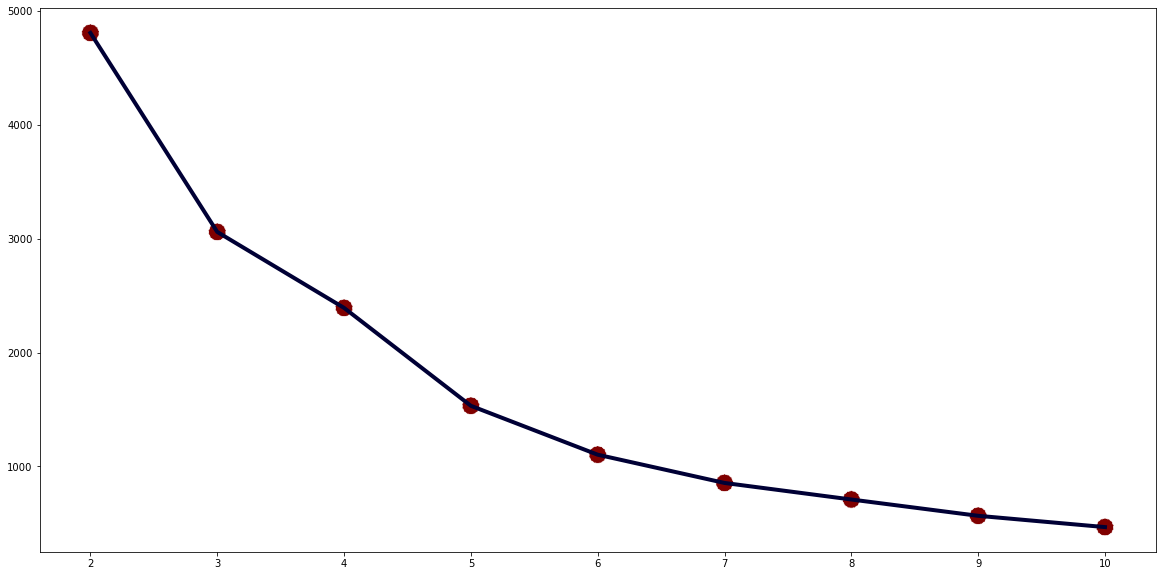

In [60]:
#Elbow Method to Find the Best Cluster
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_KMeans_train.values)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000035', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

*From Elbow Method in above, the best total cluster is 3*

In [61]:
#Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_KMeans_train.values)

KMeans(n_clusters=3, random_state=0)

In [62]:
#Add label 'clusters' to data train
df_KMeans_train['clusters'] = kmeans.labels_
df_KMeans_train

,Jumlah,Harga_Satuan,clusters
0,-0.240015,-0.304373,0
1,0.289067,0.211205,0
2,0.266355,-0.113969,0
3,-0.103527,0.345672,0
4,-0.197403,-0.236223,0
...,...,...,...
4355,-0.230282,-0.255249,0
4356,-0.228335,-0.264186,0
4357,-0.218818,-0.239047,0
4358,0.061730,1.003113,0


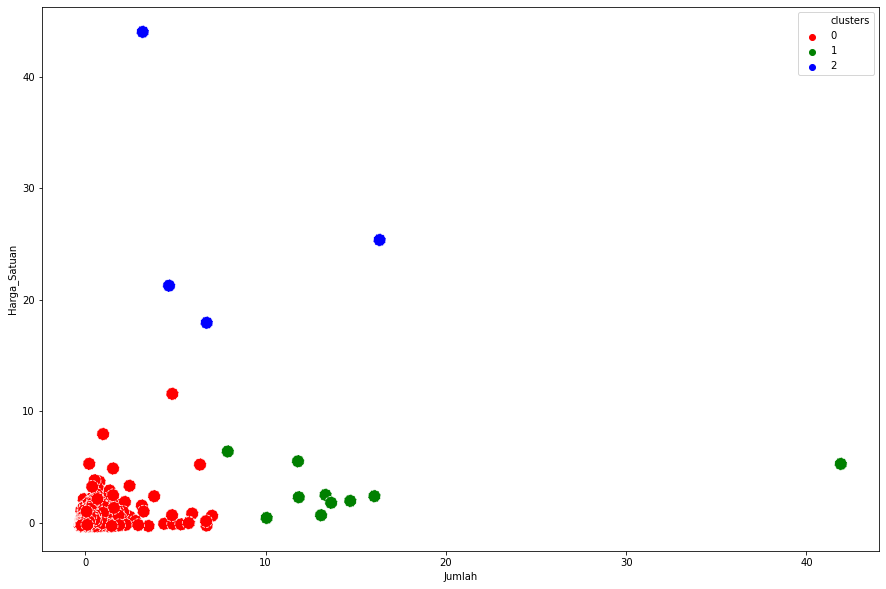

In [63]:
#Visualization the Clusters
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="Jumlah", y="Harga_Satuan",
    hue="clusters",
    linestyle='--',
    data=df_KMeans_train,
    palette=['red','green','blue'],
    s=160,
    ax=ax
)

In [64]:
#Silhouette Score Evaluation
from sklearn.metrics import silhouette_score
for n_clusters in range (2, 11):
    clusterer_All = KMeans(n_clusters=n_clusters)
    preds_All = clusterer_All.fit_predict(df_KMeans_train)
    centers_All = clusterer_All.cluster_centers_

    score_All = silhouette_score(df_KMeans_train, preds_All)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score_All))

For n_clusters = 2, silhouette score is 0.9711785442362934)
For n_clusters = 3, silhouette score is 0.9678577743291075)
For n_clusters = 4, silhouette score is 0.9494042785817587)
For n_clusters = 5, silhouette score is 0.7550649329277849)
For n_clusters = 6, silhouette score is 0.7557468190240141)
For n_clusters = 7, silhouette score is 0.7408681081344664)
For n_clusters = 8, silhouette score is 0.6457865857944046)
For n_clusters = 9, silhouette score is 0.6457418331578888)
For n_clusters = 10, silhouette score is 0.6483626124070951)


In [65]:
df_KMeans_train['clusters'].value_counts()

0    4346
1      10
2       4
Name: clusters, dtype: int64

**Best total clusters based on silhoutte score evaluation is around 2-4 clusters**

## Objective 4

### a. From zero_transaction, we have a new insight that any anomaly with minus Jumlah

In [66]:
non_zero.loc[non_zero['Kode_Bayar'] == 'C581484']

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Total_Sales
540422,C581484,23843,"""PAPER CRAFT , LITTLE BIRDIE",-80995.0,NaT,2.08,NaN,United Kingdom,-168469.6


In [67]:
minus = non_zero.loc[non_zero['Jumlah'] <=0]
minus

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Total_Sales
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12.0,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,-23.40
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11.0,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5.0,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1.0,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


**We need to discuss with the Sales Team why any minus data which mean made our store deficit**

### b. Another anomaly data transaction

In [68]:
discount = data.copy()
discount ['Total_Sales'] = discount.Jumlah * discount.Harga_Satuan

In [69]:
discount.loc[discount['Kode_Barang'] == 'D'].sort_values(by='Total_Sales')

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Total_Sales
150591,C549452,D,Discount,-1.0,4/8/2011 14:17,1867.86,17940.0,United Kingdom,-1867.86
300951,C563225,D,Discount,-1.0,8/14/2011 14:35,434.51,14911.0,EIRE,-434.51
14498,C537597,D,Discount,-1.0,12/7/2010 12:34,281.00,15498.0,United Kingdom,-281.00
19392,C537857,D,Discount,-1.0,12/8/2010 16:00,267.12,17340.0,United Kingdom,-267.12
304662,C563593,D,Discount,-1.0,8/18/2011 6:13,206.40,14646.0,Netherlands,-206.40
...,...,...,...,...,...,...,...,...,...
304661,C563592,D,Discount,-1.0,8/18/2011 6:12,9.60,16029.0,United Kingdom,-9.60
108088,C545478,D,Discount,-720.0,3/3/2011 11:08,0.01,16422.0,United Kingdom,-7.20
182729,C552569,D,Discount,-240.0,5/10/2011 12:06,0.03,12901.0,United Kingdom,-7.20
465548,C576244,D,Discount,-1.0,11/14/2011 13:40,6.00,18167.0,United Kingdom,-6.00


In [70]:
most_disc = discount.loc[discount['Kode_Pelanggan'] == 17940.0]
most_disc

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Total_Sales
86501,543549,22616,PACK OF 12 LONDON TISSUES,432.0,2/10/2011 9:29,0.22,17940.0,United Kingdom,95.04
86502,543549,21981,PACK OF 12 WOODLAND TISSUES,432.0,2/10/2011 9:29,0.22,17940.0,United Kingdom,95.04
86503,543549,21982,PACK OF 12 SUKI TISSUES,1296.0,2/10/2011 9:29,0.22,17940.0,United Kingdom,285.12
86504,543549,21986,PACK OF 12 PINK POLKADOT TISSUES,1296.0,2/10/2011 9:29,0.22,17940.0,United Kingdom,285.12
86505,543549,21985,PACK OF 12 HEARTS DESIGN TISSUES,1296.0,2/10/2011 9:29,0.22,17940.0,United Kingdom,285.12
113120,545911,21981,PACK OF 12 WOODLAND TISSUES,432.0,3/8/2011 10:12,0.21,17940.0,United Kingdom,90.72
113121,545911,22616,PACK OF 12 LONDON TISSUES,432.0,3/8/2011 10:12,0.21,17940.0,United Kingdom,90.72
145811,548910,21982,PACK OF 12 SUKI TISSUES,432.0,4/5/2011 8:51,0.20,17940.0,United Kingdom,86.40
145812,548910,22616,PACK OF 12 LONDON TISSUES,432.0,4/5/2011 8:51,0.20,17940.0,United Kingdom,86.40
145813,548910,21982,PACK OF 12 SUKI TISSUES,432.0,4/5/2011 8:51,0.20,17940.0,United Kingdom,86.40


In [71]:
#calculate total sales for this customer
most_disc.groupby(['Kode_Pelanggan']).agg({'Total_Sales': 'sum'}).reset_index()

,Kode_Pelanggan,Total_Sales
0,17940.0,1983.58


*Anomaly transaction for customer number 17940*

In [72]:
eire = discount.loc[(discount['Kode_Pelanggan'] == 14911.0) & (discount['Total_Sales'] < 0),:]
eire.sort_values(by='Total_Sales', ascending=False)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Total_Sales
361762,C568377,20724,RED RETROSPOT CHARLOTTE BAG,-1.0,9/27/2011 8:53,0.85,14911.0,EIRE,-0.85
369961,C569114,22197,POPCORN HOLDER,-1.0,9/30/2011 12:50,0.85,14911.0,EIRE,-0.85
304674,C563600,22608,PENS ASSORTED FUNKY JEWELED,-7.0,8/18/2011 6:24,0.19,14911.0,EIRE,-1.33
237584,C557874,22961,JAM MAKING SET PRINTED,-1.0,6/23/2011 13:05,1.45,14911.0,EIRE,-1.45
304682,C563600,21584,RETROSPOT SMALL TUBE MATCHES,-1.0,8/18/2011 6:24,1.65,14911.0,EIRE,-1.65
...,...,...,...,...,...,...,...,...,...
300951,C563225,D,Discount,-1.0,8/14/2011 14:35,434.51,14911.0,EIRE,-434.51
290359,C562375,23157,SET OF 6 NATIVITY MAGNETS,-240.0,8/4/2011 14:46,1.85,14911.0,EIRE,-444.00
290366,C562375,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,-200.0,8/4/2011 14:46,2.55,14911.0,EIRE,-510.00
117052,C546325,M,Manual,-1.0,3/11/2011 10:15,1687.17,14911.0,EIRE,-1687.17


In [73]:
#calculate total sales for this customer
eire.groupby(['Kode_Pelanggan']).agg({'Total_Sales': 'sum'}).reset_index()

,Kode_Pelanggan,Total_Sales
0,14911.0,-11244.64


In [74]:
eire_all = non_zero.loc[non_zero['Negara'] == 'EIRE']
eire_all

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Total_Sales
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4.0,2010-12-01 14:05:00,9.95,14911.0,EIRE,39.8
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6.0,2010-12-01 14:05:00,2.95,14911.0,EIRE,17.7
1406,536540,85071C,"""CHARLIE+LOLA""""EXTREMELY BUSY"""" SIGN",6.0,NaT,2.55,NaN,EIRE,15.3
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50.0,2010-12-01 14:05:00,0.85,14911.0,EIRE,42.5
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6.0,2010-12-01 14:05:00,2.25,14911.0,EIRE,13.5
...,...,...,...,...,...,...,...,...,...
539151,581433,22192,BLUE DINER WALL CLOCK,2.0,2011-12-08 15:54:00,8.50,14911.0,EIRE,17.0
539152,581433,48187,DOORMAT NEW ENGLAND,2.0,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5
539153,581433,48184,DOORMAT ENGLISH ROSE,2.0,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5
539154,581433,20685,DOORMAT RED RETROSPOT,2.0,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5


In [75]:
eire_all.Kode_Pelanggan.unique()

array([14911.,    nan, 14156., 14016.])

In [76]:
eire_all.groupby(['Kode_Pelanggan']).agg({'Total_Sales': 'sum'}).reset_index()

,Kode_Pelanggan,Total_Sales
0,14016.0,4258.74
1,14156.0,113528.97
2,14911.0,132450.26


*One of the best decision by sales team who gived a good discount for customer 14911, because he/she is the most buyers from Ireland*